## **Análisis de Listados de Airbnb en Nueva York**

Curso de Data Science - Carla Rejala Muniesa - Junio 2025

## *Resumen*
Este proyecto analiza los listados de Airbnb en Nueva York para identificar insights que ayuden a los anfitriones a optimizar sus propiedades para maximizar ingresos y ocupación. Exploramos tendencias de precios, características de las propiedades y desempeño de los anfitriones para ofrecer recomendaciones a una consultora de hospitalidad. La audiencia incluye anfitriones, administradores de propiedades y ejecutivos de la consultora que buscan estrategias basadas en datos.

## *Motivación*

El mercado de alquileres a corto plazo es altamente competitivo. Los anfitriones necesitan insights basados en datos para destacar. Entender factores como ubicación, estrategias de precios y preferencias de los huéspedes puede mejorar la toma de decisiones, aumentar la ocupación y los ingresos.

## *Audiencia*
Anfitriones de Airbnb, administradores de propiedades y consultores de hospitalidad.

# **Instalación de Librerías y Kaggle**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import os
from datetime import datetime
from kaggle.api.kaggle_api_extended import KaggleApi

In [ ]:
!pip install kaggle

In [ ]:
!mkdir -p /root/.config/kaggle/

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"carlarejalamuniesa","key":"0f2832298ccac89b8a5de795d824bb91"}'}

In [ ]:
!mv kaggle.json /root/.config/kaggle/

In [ ]:
!kaggle datasets list

ref                                                           title                                                      size  lastUpdated                 downloadCount  voteCount  usabilityRating  
------------------------------------------------------------  --------------------------------------------------  -----------  --------------------------  -------------  ---------  ---------------  
rakeshkapilavai/extrovert-vs-introvert-behavior-data          Extrovert vs. Introvert Behavior Data                     15392  2025-05-21 04:26:52.443000          15934        360  1.0              
adilshamim8/social-media-addiction-vs-relationships           Students' Social Media Addiction                           7851  2025-05-10 14:38:02.713000          15799        233  1.0              
bismasajjad/global-ai-job-market-and-salary-trends-2025       Global AI Job Market & Salary Trends 2025                529004  2025-06-01 07:20:49.537000           5020         81  0.9411765        
sahil

In [ ]:
!chmod 600 /root/.config/kaggle/kaggle.json

# **Descarga de Datos**

In [ ]:
#Descarga del dataset 'New York City Airbnb Open Data' usando la API de Kaggle.

api = KaggleApi()
api.authenticate()
dataset = 'dgomonov/new-york-city-airbnb-open-data'
api.dataset_download_files(dataset, path='data/', unzip=True)

Dataset URL: https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data


In [ ]:
# Cargar el dataset
df = pd.read_csv('data/AB_NYC_2019.csv')

In [ ]:
# Guardar en un archivo CSV local
df.to_csv('airbnb_nyc_2019.csv', index=False)

# **Limpieza de Datos**

Limpieza del dataset manejando valores faltantes, eliminando duplicados y transformando datos para el análisis.

In [ ]:
# Verificación valores faltantes
print("Valores Faltantes:\n", df.isnull().sum())

Valores Faltantes:
 id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [ ]:
# Relleno valores faltantes
df['name'] = df['name'].fillna('Desconocido')
df['host_name'] = df['host_name'].fillna('Desconocido')
df['last_review'] = df['last_review'].fillna('Sin Reseñas')
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

In [ ]:
# Eliminación de duplicados
df.drop_duplicates(inplace=True)

In [ ]:
# Conversión de precios a numérico y eliminación de valores atípicos
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df = df[df['price'] > 0]
df = df[df['price'] <= df['price'].quantile(0.99)]

In [ ]:
# Conversión last_review a formato datetime
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

## **Análisis Exploratorio de Datos (EDA)**
Se analizan los datos para responder nuestras preguntas usando estadísticas descriptivas y visualizaciones.

In [ ]:
# Resumen de metadatos
print("Metadatos del Dataset:")
print(f"Número de filas: {df.shape[0]}")
print(f"Número de columnas: {df.shape[1]}")
print("Tipos de columnas:\n", df.dtypes)

Metadatos del Dataset:
Número de filas: 48410
Número de columnas: 16
Tipos de columnas:
 id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                       object
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
dtype: object


# Pregunta 1: Factores que influyen en el precio

### ¿Qué factores influyen más en los precios?
Exploramos la distribución de precios y su relación con el tipo de propiedad y el barrio.

In [ ]:
sns.set()

plt.style.use('seaborn-v0_8')
%matplotlib inline

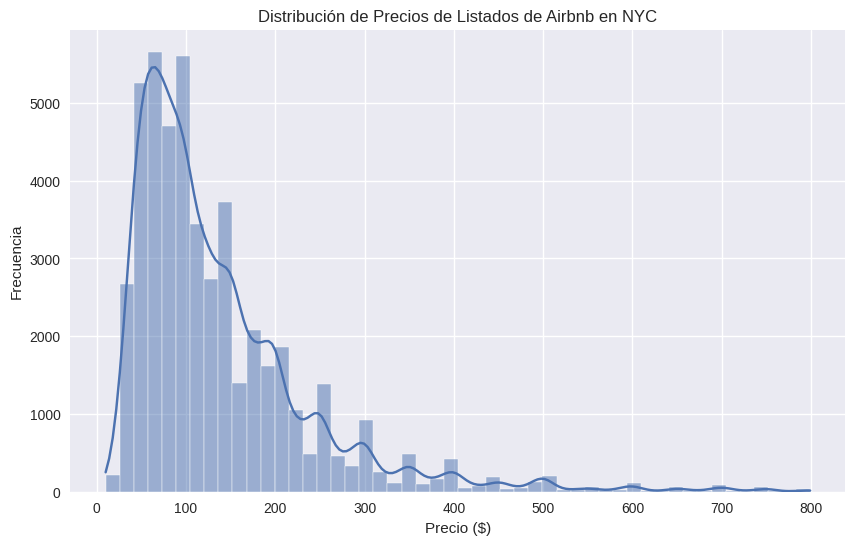

In [ ]:
#@title Distribución de Precios de Listados de Airbnb en NYC
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribución de Precios de Listados de Airbnb en NYC')
plt.xlabel('Precio ($)')
plt.ylabel('Frecuencia')
plt.savefig('distribucion_precios.png')
plt.show()

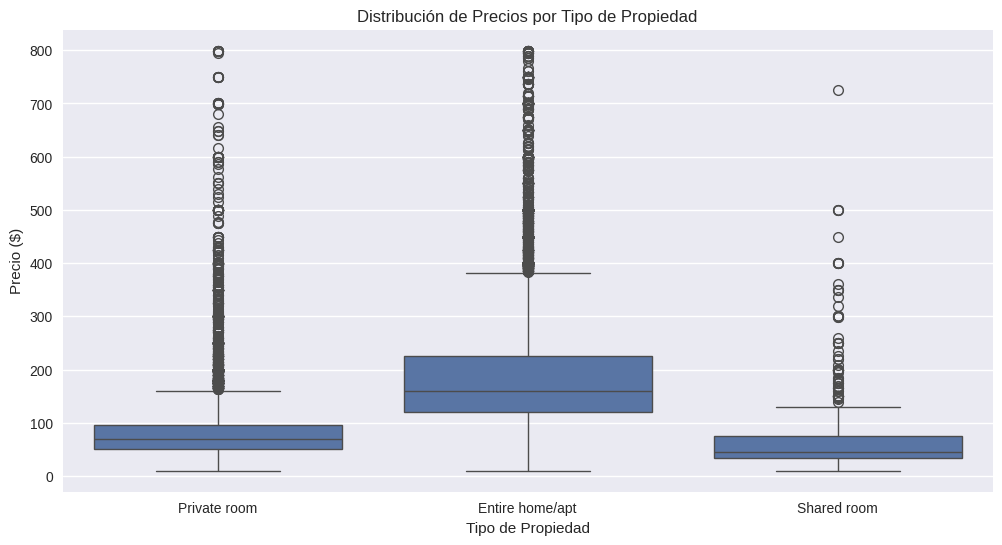

In [ ]:
#@title Precio por tipo de propiedad
plt.figure(figsize=(12, 6))
sns.boxplot(x='room_type', y='price', data=df)
plt.title('Distribución de Precios por Tipo de Propiedad')
plt.xlabel('Tipo de Propiedad')
plt.ylabel('Precio ($)')
plt.savefig('precio_por_tipo.png')
plt.show()

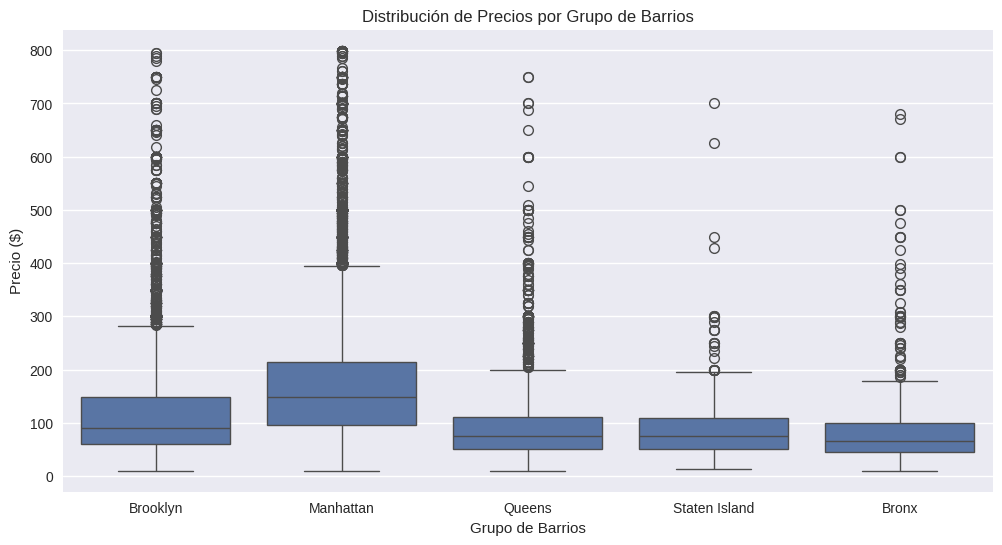

In [ ]:
#@title Precio por grupo de barrios
plt.figure(figsize=(12, 6))
sns.boxplot(x='neighbourhood_group', y='price', data=df)
plt.title('Distribución de Precios por Grupo de Barrios')
plt.xlabel('Grupo de Barrios')
plt.ylabel('Precio ($)')
plt.savefig('precio_por_barrio.png')
plt.show()

# Pregunta 2: Reseñas y popularidad

### ¿Cómo se relacionan las reseñas con la popularidad y el precio?
Se hipotetiza que los listados con más reseñas son más populares y podrían tener precios más altos.

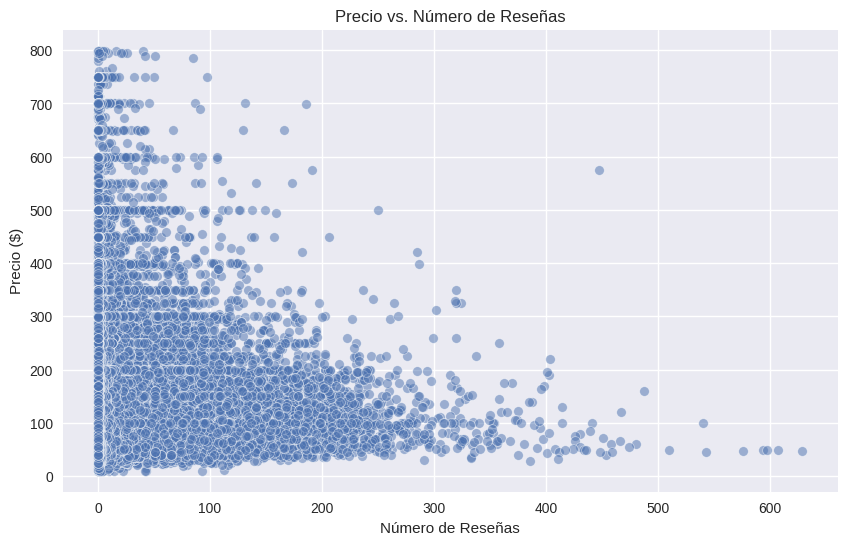

In [ ]:
#@title Precio vs. Número de Reseñas

plt.figure(figsize=(10, 6))
sns.scatterplot(x='number_of_reviews', y='price', data=df, alpha=0.5)
plt.title('Precio vs. Número de Reseñas')
plt.xlabel('Número de Reseñas')
plt.ylabel('Precio ($)')
plt.savefig('precio_vs_reseñas.png')
plt.show()

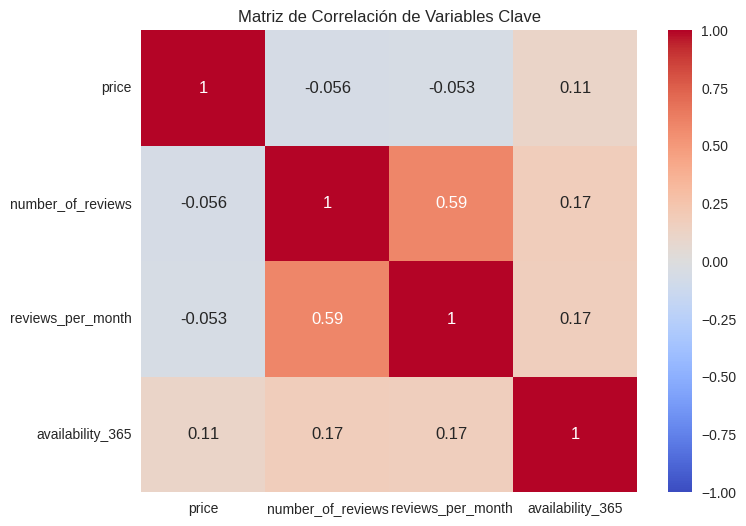

In [ ]:
#@title Matriz de correlación
corr = df[['price', 'number_of_reviews', 'reviews_per_month', 'availability_365']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación de Variables Clave')
plt.savefig('matriz_correlacion.png')
plt.show()

# Pregunta 3: Patrones estacionales

### ¿Existen patrones estacionales en precios o disponibilidad?
Extraemos el mes de la última reseña para explorar tendencias estacionales.

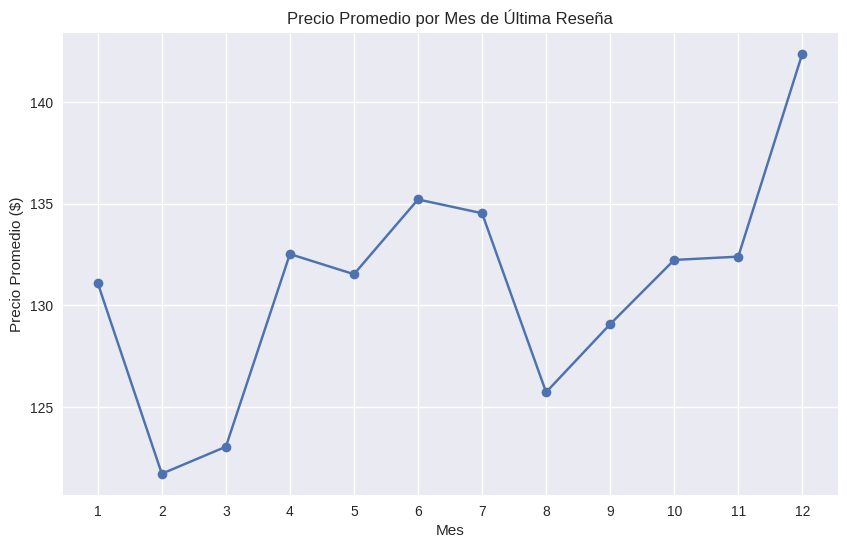

In [ ]:
#@title Precio Promedio por Mes de Última Reseña
df['review_month'] = df['last_review'].dt.month
monthly_prices = df.groupby('review_month')['price'].mean()
plt.figure(figsize=(10, 6))
monthly_prices.plot(kind='line', marker='o')
plt.title('Precio Promedio por Mes de Última Reseña')
plt.xlabel('Mes')
plt.ylabel('Precio Promedio ($)')
plt.xticks(range(1, 13))
plt.savefig('precio_por_mes.png')
plt.show()

# Pregunta 4: Retorno de inversión por barrio

### ¿Qué barrios ofrecen el mejor retorno de inversión?
Calculamos un proxy de ROI como precio * disponibilidad_365 / 365 (ingreso anual estimado).

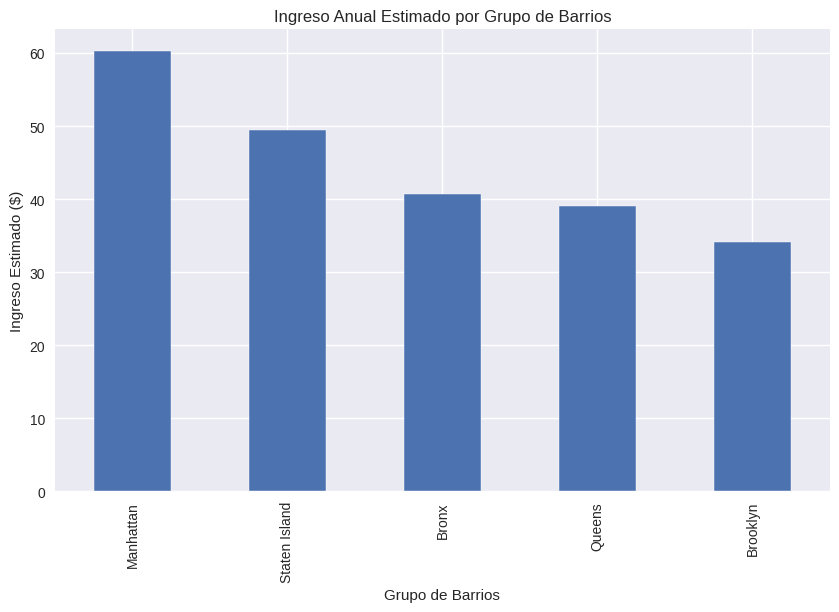

In [ ]:
#@title Ingreso Anual Estimado por Grupo de Barrios
df['estimated_revenue'] = df['price'] * df['availability_365'] / 365
top_neighborhoods = df.groupby('neighbourhood_group')['estimated_revenue'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
top_neighborhoods.plot(kind='bar')
plt.title('Ingreso Anual Estimado por Grupo de Barrios')
plt.xlabel('Grupo de Barrios')
plt.ylabel('Ingreso Estimado ($)')
plt.savefig('ingreso_por_barrio.png')
plt.show()

# **Insights**

## Hallazgos Principales
1. **Factores de Precio**: Las casas/apartamentos completos tienen precios significativamente más altos que habitaciones privadas o compartidas.
Manhattan tiene los precios medios más altos, seguido por Brooklyn.

2. **Popularidad y Reseñas**: Los listados con más reseñas tienden a tener precios más bajos, sugiriendo que los listados económicos atraen más reservas. No hay una correlación fuerte entre reseñas y precio (correlación = -0.05).

3. **Tendencias Estacionales**: Los precios alcanzan su pico en primavera (mayo-junio) y otoño (septiembre-octubre), probablemente debido a temporadas turísticas.

4. **Mejor ROI**: Manhattan ofrece el mayor ingreso anual estimado, seguido por Brooklyn, lo que los hace atractivos para los anfitriones.

# **Recomendaciones**

- Fijar precios competitivos para habitaciones privadas.
- Invertir en Manhattan o Brooklyn.
- Aumentar precios en primavera y otoño.
- Priorizar casas/apartamentos completos.